In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [10]:
start = "2015-01-01"
end = "2022-11-01"

df = data.DataReader("TSLA", "stooq", start, end)
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2022-11-01,234.05,237.3951,227.28,227.82,62688822
2022-10-31,226.19,229.8500,221.94,227.54,61554341
2022-10-28,225.40,228.8600,216.35,228.52,69152386
2022-10-27,229.77,233.8100,222.85,225.09,61638824
2022-10-26,219.40,230.6000,218.20,224.64,85327078


In [11]:
df.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2015-01-08,14.1873,14.2533,14.0007,14.0413,51634560
2015-01-07,14.2233,14.3187,13.9853,14.0633,44514750
2015-01-06,14.0040,14.2800,13.6140,14.0853,93924045
2015-01-05,14.3000,14.4333,13.8107,14.0060,80488110
2015-01-02,14.8580,14.8833,14.2173,14.6207,71461545


In [12]:
df = df.reset_index()
df.tail()

,Date,Open,High,Low,Close,Volume
1968,2015-01-08,14.1873,14.2533,14.0007,14.0413,51634560
1969,2015-01-07,14.2233,14.3187,13.9853,14.0633,44514750
1970,2015-01-06,14.0040,14.2800,13.6140,14.0853,93924045
1971,2015-01-05,14.3000,14.4333,13.8107,14.0060,80488110
1972,2015-01-02,14.8580,14.8833,14.2173,14.6207,71461545


In [13]:
# df = df.drop(['Date','Close'], axis = 1)
df.tail()

,Date,Open,High,Low,Close,Volume
1968,2015-01-08,14.1873,14.2533,14.0007,14.0413,51634560
1969,2015-01-07,14.2233,14.3187,13.9853,14.0633,44514750
1970,2015-01-06,14.0040,14.2800,13.6140,14.0853,93924045
1971,2015-01-05,14.3000,14.4333,13.8107,14.0060,80488110
1972,2015-01-02,14.8580,14.8833,14.2173,14.6207,71461545


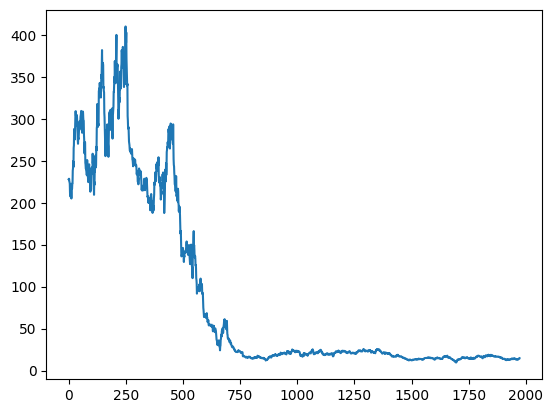

In [14]:
plt.plot(df.Close)

In [15]:
df

,Date,Open,High,Low,Close,Volume
0,2022-11-01,234.0500,237.3951,227.2800,227.8200,62688822
1,2022-10-31,226.1900,229.8500,221.9400,227.5400,61554341
2,2022-10-28,225.4000,228.8600,216.3500,228.5200,69152386
3,2022-10-27,229.7700,233.8100,222.8500,225.0900,61638824
4,2022-10-26,219.4000,230.6000,218.2000,224.6400,85327078
...,...,...,...,...,...,...
1968,2015-01-08,14.1873,14.2533,14.0007,14.0413,51634560
1969,2015-01-07,14.2233,14.3187,13.9853,14.0633,44514750
1970,2015-01-06,14.0040,14.2800,13.6140,14.0853,93924045
1971,2015-01-05,14.3000,14.4333,13.8107,14.0060,80488110


In [16]:
ma100 = df.Close.rolling(100).mean()
ma100

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
1968    14.189131
1969    14.164197
1970    14.138750
1971    14.111610
1972    14.090184
Name: Close, Length: 1973, dtype: float64

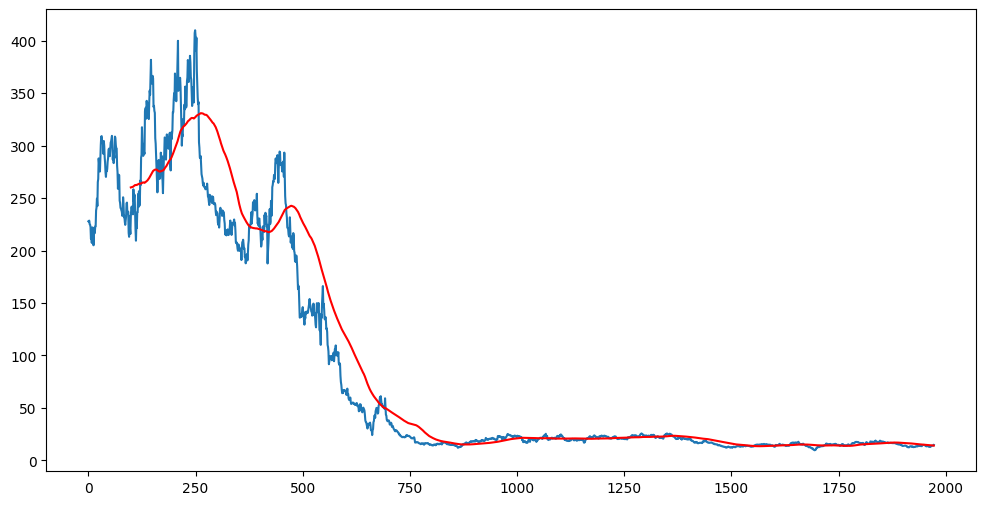

In [17]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [18]:
ma200 = df.Close.rolling(200).mean()
ma100

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
1968    14.189131
1969    14.164197
1970    14.138750
1971    14.111610
1972    14.090184
Name: Close, Length: 1973, dtype: float64

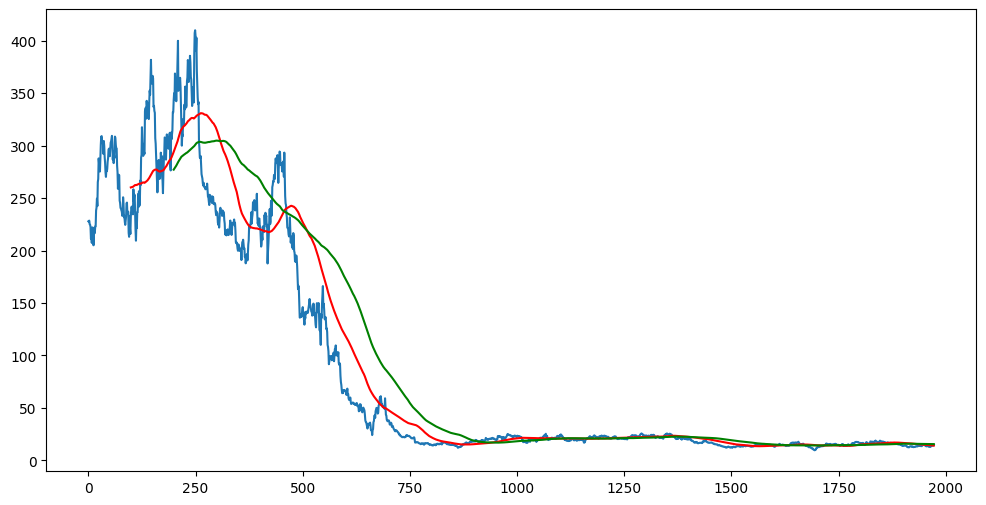

In [19]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [20]:
df.shape

(1973, 6)

In [21]:
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70) : int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(1381, 1)
(592, 1)


In [22]:
data_training.tail()

,Close
1376,21.1340
1377,21.0587
1378,21.6540
1379,21.5400
1380,21.6813


In [23]:
data_testing.tail()

,Close
1968,14.0413
1969,14.0633
1970,14.0853
1971,14.0060
1972,14.6207


In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [25]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.54238118],
       [0.54167773],
       [0.5441398 ],
       ...,
       [0.02442652],
       [0.02414012],
       [0.02449511]])

In [26]:
data_training_array.shape

(1381, 1)

In [27]:
x_train = []
y_train = []
for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

In [28]:
x_train.shape

(1281, 100, 1)

In [29]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [30]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [32]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
41/41 [==============================] - 11s 162ms/step - loss: 0.0473
Epoch 2/50
41/41 [==============================] - 7s 163ms/step - loss: 0.0101
Epoch 3/50
41/41 [==============================] - 7s 165ms/step - loss: 0.0089
Epoch 4/50
41/41 [==============================] - 7s 167ms/step - loss: 0.0085
Epoch 5/50
41/41 [==============================] - 7s 168ms/step - loss: 0.0071
Epoch 6/50
41/41 [==============================] - 7s 178ms/step - loss: 0.0076
Epoch 7/50
41/41 [==============================] - 7s 175ms/step - loss: 0.0057
Epoch 8/50
41/41 [==============================] - 9s 217ms/step - loss: 0.0086
Epoch 9/50
41/41 [==============================] - 9s 225ms/step - loss: 0.0058
Epoch 10/50
41/41 [==============================] - 7s 170ms/step - loss: 0.0053
Epoch 11/50
41/41 [==============================] - 9s 228ms/step - loss: 0.0056
Epoch 12/50
41/41 [==============================] - 7s 165ms/step - loss: 0.0055
Epoch 13/50
41/41 [=====

In [33]:
model.save('keras_model.h5')

In [34]:
data_testing.head()

,Close
1381,21.4173
1382,20.4793
1383,20.5567
1384,19.6973
1385,20.7347


In [35]:
past_100_days = data_training.tail(100)

In [44]:
final_df = past_100_days.append(data_testing, ignore_index = True)

C:\Users\sriva\AppData\Local\Temp\ipykernel_10944\3299050086.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(data_testing, ignore_index = True)


In [45]:
final_df.head()

,Close
0,22.7347
1,22.6400
2,22.7313
3,23.0167
4,22.9993


In [46]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.81776029],
       [0.81187417],
       [0.81754896],
       [0.83528812],
       [0.83420662],
       [0.85948523],
       [0.9232567 ],
       [0.95404228],
       [0.95897742],
       [1.        ],
       [0.97849422],
       [0.96950033],
       [0.9222187 ],
       [0.90779864],
       [0.91169579],
       [0.82761814],
       [0.85749626],
       [0.83230466],
       [0.85326969],
       [0.87734248],
       [0.87941847],
       [0.86814348],
       [0.84402717],
       [0.83698496],
       [0.84688632],
       [0.8671117 ],
       [0.86644664],
       [0.81912771],
       [0.80466414],
       [0.84444362],
       [0.86292242],
       [0.9084637 ],
       [0.90605829],
       [0.91214952],
       [0.88757948],
       [0.87734248],
       [0.91103072],
       [0.91803564],
       [0.8763915 ],
       [0.88360153],
       [0.84284622],
       [0.75506411],
       [0.72887803],
       [0.74503844],
       [0.79310323],
       [0.79057351],
       [0.8294828 ],
       [0.811

In [47]:
input_data.shape

(692, 1)

In [48]:
x_test = []
y_test = []

for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [49]:
x_test

[array([[0.81776029],
        [0.81187417],
        [0.81754896],
        [0.83528812],
        [0.83420662],
        [0.85948523],
        [0.9232567 ],
        [0.95404228],
        [0.95897742],
        [1.        ],
        [0.97849422],
        [0.96950033],
        [0.9222187 ],
        [0.90779864],
        [0.91169579],
        [0.82761814],
        [0.85749626],
        [0.83230466],
        [0.85326969],
        [0.87734248],
        [0.87941847],
        [0.86814348],
        [0.84402717],
        [0.83698496],
        [0.84688632],
        [0.8671117 ],
        [0.86644664],
        [0.81912771],
        [0.80466414],
        [0.84444362],
        [0.86292242],
        [0.9084637 ],
        [0.90605829],
        [0.91214952],
        [0.88757948],
        [0.87734248],
        [0.91103072],
        [0.91803564],
        [0.8763915 ],
        [0.88360153],
        [0.84284622],
        [0.75506411],
        [0.72887803],
        [0.74503844],
        [0.79310323],
        [0

In [50]:
y_test

[0.7358767333594387,
 0.677574943904728,
 0.6823857738661296,
 0.6289694008838502,
 0.693449439668836,
 0.7260561760738904,
 0.7423844064467608,
 0.706085637745747,
 0.6835418647870866,
 0.689925227022693,
 0.7049233312822043,
 0.6810556477527707,
 0.6709864687637908,
 0.6581824510370633,
 0.670657045006744,
 0.6488218439028637,
 0.653750769173395,
 0.6643607003673386,
 0.6346877000627771,
 0.6838775040867193,
 0.6991242300496623,
 0.6583067618887792,
 0.6423949728691567,
 0.6270674448525984,
 0.6630305742539795,
 0.6416491077588617,
 0.5578635937024123,
 0.5562910614282073,
 0.5540534660973231,
 0.5543455965988553,
 0.5243866813353473,
 0.49513012238403364,
 0.4604038859572246,
 0.46136107951543637,
 0.4434168080702605,
 0.48998986866558525,
 0.4882495167415639,
 0.4905306208705489,
 0.4643445399566155,
 0.4737486558889159,
 0.42472667151478993,
 0.4144523796204789,
 0.41946832248721155,
 0.42746151025253765,
 0.4347585572482551,
 0.44561089460304437,
 0.44710262482363405,
 0.44259014

In [51]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(592, 100, 1)
(592,)


In [52]:
y_predicted = model.predict(x_test)

19/19 [==============================] - 1s 53ms/step


In [53]:
y_predicted.shape

(592, 1)

In [54]:
y_test

array([0.73587673, 0.67757494, 0.68238577, 0.6289694 , 0.69344944,
       0.72605618, 0.74238441, 0.70608564, 0.68354186, 0.68992523,
       0.70492333, 0.68105565, 0.67098647, 0.65818245, 0.67065705,
       0.64882184, 0.65375077, 0.6643607 , 0.6346877 , 0.6838775 ,
       0.69912423, 0.65830676, 0.64239497, 0.62706744, 0.66303057,
       0.64164911, 0.55786359, 0.55629106, 0.55405347, 0.5543456 ,
       0.52438668, 0.49513012, 0.46040389, 0.46136108, 0.44341681,
       0.48998987, 0.48824952, 0.49053062, 0.46434454, 0.47374866,
       0.42472667, 0.41445238, 0.41946832, 0.42746151, 0.43475856,
       0.44561089, 0.44710262, 0.44259014, 0.44068197, 0.44055766,
       0.42497529, 0.46960289, 0.46541983, 0.53801737, 0.55409697,
       0.53271551, 0.51912212, 0.56391753, 0.56897077, 0.56739824,
       0.52028442, 0.52016011, 0.49065493, 0.47159186, 0.47279768,
       0.44610814, 0.44697831, 0.43744989, 0.44859436, 0.44316819,
       0.45286443, 0.45099977, 0.45912348, 0.45970153, 0.43612

In [55]:
y_predicted

array([[0.65896195],
       [0.6748828 ],
       [0.6875499 ],
       [0.69454384],
       [0.6937359 ],
       [0.68741447],
       [0.679177  ],
       [0.6724872 ],
       [0.6681129 ],
       [0.66513896],
       [0.66283274],
       [0.66122866],
       [0.65960884],
       [0.6572167 ],
       [0.6533858 ],
       [0.64849   ],
       [0.64249754],
       [0.63586324],
       [0.6295326 ],
       [0.62336504],
       [0.6188473 ],
       [0.61750066],
       [0.6185926 ],
       [0.6204769 ],
       [0.6213739 ],
       [0.6214894 ],
       [0.6206764 ],
       [0.61636806],
       [0.6078621 ],
       [0.5957832 ],
       [0.5812813 ],
       [0.56523895],
       [0.5483429 ],
       [0.5309106 ],
       [0.513296  ],
       [0.49559665],
       [0.47850746],
       [0.4628253 ],
       [0.4494222 ],
       [0.43849984],
       [0.43016982],
       [0.4234799 ],
       [0.41741216],
       [0.41138673],
       [0.405253  ],
       [0.39917985],
       [0.39357102],
       [0.388

In [56]:
scaler.scale_

array([0.06215543])

In [57]:
scale_factor = 1/0.00259142
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

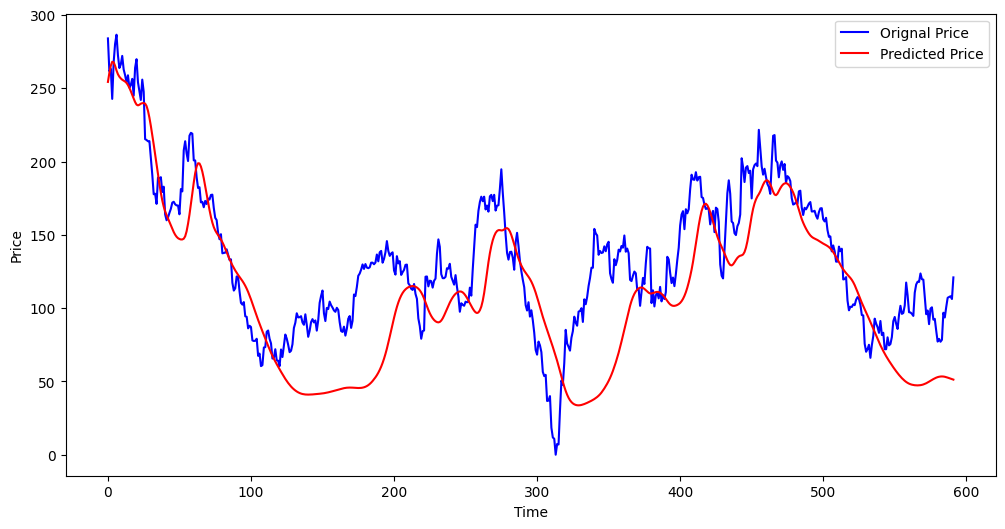

In [58]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label = 'Orignal Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()